In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Third example : Multiclass classification

Epoch 1/9
16/16 [==============================] - 2s 68ms/step - loss: 2.7773 - accuracy: 0.5061 - val_loss: 1.8140 - val_accuracy: 0.6400
Epoch 2/9
16/16 [==============================] - 1s 52ms/step - loss: 1.4535 - accuracy: 0.7082 - val_loss: 1.3007 - val_accuracy: 0.7300
Epoch 3/9
16/16 [==============================] - 1s 51ms/step - loss: 1.0467 - accuracy: 0.7871 - val_loss: 1.1224 - val_accuracy: 0.7600
Epoch 4/9
16/16 [==============================] - 1s 52ms/step - loss: 0.8280 - accuracy: 0.8237 - val_loss: 1.0191 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 1s 51ms/step - loss: 0.6606 - accuracy: 0.8599 - val_loss: 0.9529 - val_accuracy: 0.8080
Epoch 6/9
16/16 [==============================] - 1s 52ms/step - loss: 0.5310 - accuracy: 0.8909 - val_loss: 0.9125 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 1s 54ms/step - loss: 0.4315 - accuracy: 0.9117 - val_loss: 0.8784 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

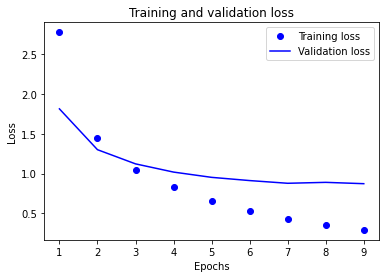

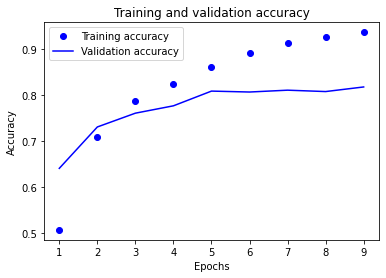

In [9]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 1° Encoding the input data
def vectorize_sequences(sequences, dimension=10000): 
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1. 
  return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# 2° Encoding the output data using the one-hot encoding
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
y_train = to_one_hot(train_labels) 
y_test = to_one_hot(test_labels)

#Or with the keras method :
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(train_labels)
# y_test = to_categorical(test_labels)

# 3° Build the model
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

# 4° Compiling 
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

# 5° Validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# 5° Training the model
history = model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

# Plots
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

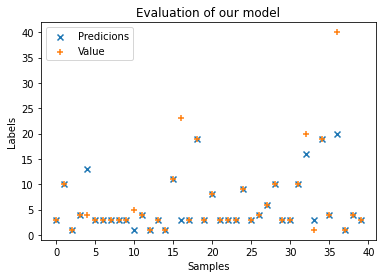

In [26]:
# Predictions
predictions = model.predict(x_test)

t = list()
t2 = list()
for i in range(len(predictions[:40])):
  t.append( np.argmax(predictions[i]))
for i in range(len(y_test[:40])):
  t2.append( np.argmax(y_test[i]) )


plt.scatter( [i for i in range(40)] ,  t , marker = 'x' , label="Predicions")
plt.scatter( [i for i in range(40)] , t2 , marker = '+' , label="Value")
plt.title("Evaluation of our model")
plt.ylabel('Labels')
plt.xlabel('Samples')
plt.legend()
plt.show()